<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [5]:
def sum_prod(X, V):
    res = np.zeros_like(V[0])
    for matrix, vector in zip(X, V):
        res += np.dot(matrix, vector)
    return res


def tests():
    res1 = sum_prod([np.array([[1, 2], [3, 4]])], [np.array([[5], [6]])])
    exp1 = np.array([[17], [39]])
    assert np.testing.assert_array_equal(res1, exp1) == None
    res2 = sum_prod([np.zeros((2, 2)), np.zeros((2, 2))], [np.zeros((2, 1)), np.zeros((2, 1))])
    exp2 = np.zeros((2, 1))
    assert np.testing.assert_array_equal(res2, exp2) == None
    print("All tests past")

tests()

All tests past


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [8]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def tests():
    res1 = binarize(np.array([[0.1, 0.6], [0.4, 0.8]]))
    exp1 = np.array([[0, 1], [0, 1]])
    assert np.testing.assert_array_equal(res1, exp1) == None
    
    res2 = binarize(np.array([[0.1, 0.6], [0.4, 0.8]]), 0.4)
    exp2 = np.array([[0, 1], [0, 1]])
    assert np.testing.assert_array_equal(res2, exp2) == None
    print("All tests past")

tests()

All tests past


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [16]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]


def is_equal(result, expected):
    r = True
    for res, exp in zip(result, expected):
        if np.testing.assert_array_equal(res, exp) != None : return False
    return r

def tests():
    res1 = unique_rows(np.array([[1, 2, 2], [3, 3, 3], [4, 5, 4]]))
    exp1 = [np.array([1, 2]), np.array([3]), np.array([4, 5])]
    assert is_equal(res1, exp1) == True
    
    res2 = unique_columns(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
    exp2 = [np.array([1, 4, 7]), np.array([2, 5, 8]), np.array([3, 6, 9])]
    assert is_equal(res2, exp2) == True
    print("All tests past")

tests()

All tests past


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [ ]:
# Your code goes here

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [30]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix


def tests():
    res1 = chess(3, 3, 1, 2)
    exp1 = np.array([[1, 2, 1],
                     [2, 1, 2],
                     [1, 2, 1]])
    assert np.testing.assert_array_equal(res1, exp1) == None
    
    res2 = chess(2, 5, 7, 8)
    exp2 = np.array([[7, 8, 7, 8, 7],
                     [8, 7, 8, 7, 8]])
    assert np.testing.assert_array_equal(res2, exp2) == None
    print("All tests past")

tests()

All tests past


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

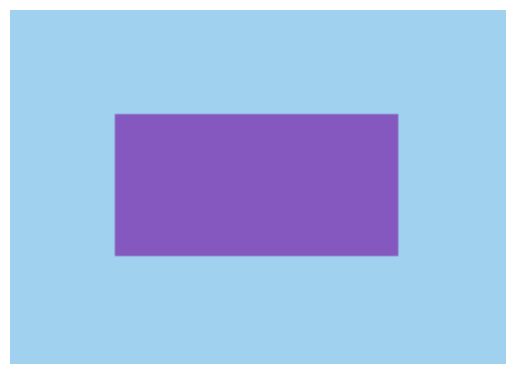

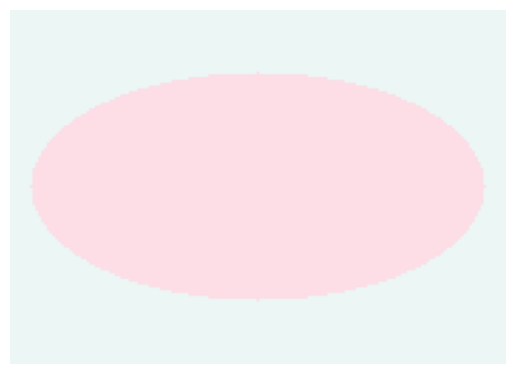

In [26]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.zeros((n, m, 3), dtype=np.uint8)
    img[:, :] = background_color
    
    #кординаты
    top_left_x = (m - a) // 2
    top_left_y = (n - b) // 2
    bottom_right_x = top_left_x + a
    bottom_right_y = top_left_y + b
    
    #прямоугольник
    img[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = rectangle_color
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.zeros((n, m, 3), dtype=np.uint8)
    img[:, :] = background_color
    
    #кординаты
    x0 = m // 2
    y0 = n // 2
    
    for x in range(m):
        for y in range(n):
            if ((x - x0) ** 2) / (a ** 2) + ((y - y0) ** 2) / (b ** 2) <= 1:
                img[y, x] = ellipse_color
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def tests():
    draw_rectangle(100, 50, 175, 125, rectangle_color=(132, 88, 190), background_color=(160, 210, 239))
    draw_ellipse(80, 40, 175, 125, ellipse_color=(253, 221, 230), background_color=(235, 246, 245))

tests()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
# Your code goes here

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [ ]:
# Your code goes here